<a href="https://colab.research.google.com/github/20Engma/sehab-APP/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter
import os


In [24]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [25]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/good data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 300 files belonging to 3 classes.


In [26]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/good data/valid',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 67 files belonging to 3 classes.


In [27]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/good data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 35 files belonging to 3 classes.


In [28]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= validation_ds, epochs = 10)

Epoch 1/10
3/3 [==============================] - 61s 18s/step - loss: 14.5894 - accuracy: 0.4733 - val_loss: 19.1473 - val_accuracy: 0.4776
Epoch 2/10
3/3 [==============================] - 54s 19s/step - loss: 1.7910 - accuracy: 0.6700 - val_loss: 1.7774 - val_accuracy: 0.5672
Epoch 3/10
3/3 [==============================] - 56s 20s/step - loss: 0.7669 - accuracy: 0.6700 - val_loss: 3.1665 - val_accuracy: 0.4030
Epoch 4/10
3/3 [==============================] - 51s 18s/step - loss: 0.6633 - accuracy: 0.7433 - val_loss: 1.8020 - val_accuracy: 0.6119
Epoch 5/10
3/3 [==============================] - 53s 19s/step - loss: 0.5097 - accuracy: 0.8267 - val_loss: 2.1231 - val_accuracy: 0.5672
Epoch 6/10
3/3 [==============================] - 56s 19s/step - loss: 0.4014 - accuracy: 0.8433 - val_loss: 2.0753 - val_accuracy: 0.4328
Epoch 7/10
3/3 [==============================] - 53s 19s/step - loss: 0.3364 - accuracy: 0.8767 - val_loss: 1.7290 - val_accuracy: 0.5821
Epoch 8/10
3/3 [=========

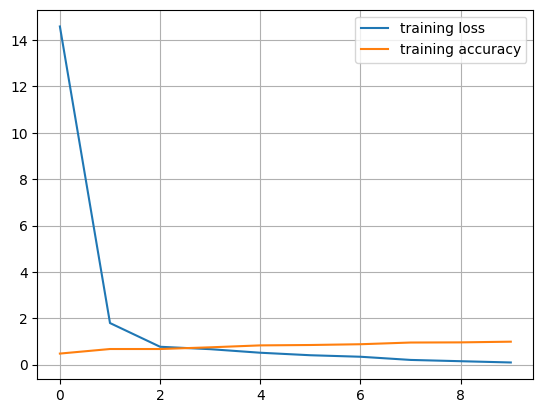

In [30]:
## stats on training data
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

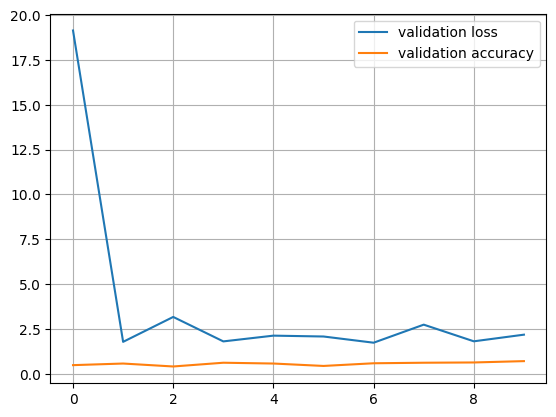

In [31]:
## stats on validation data
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

2/2 [==============================] - 5s 294ms/step


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 35 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

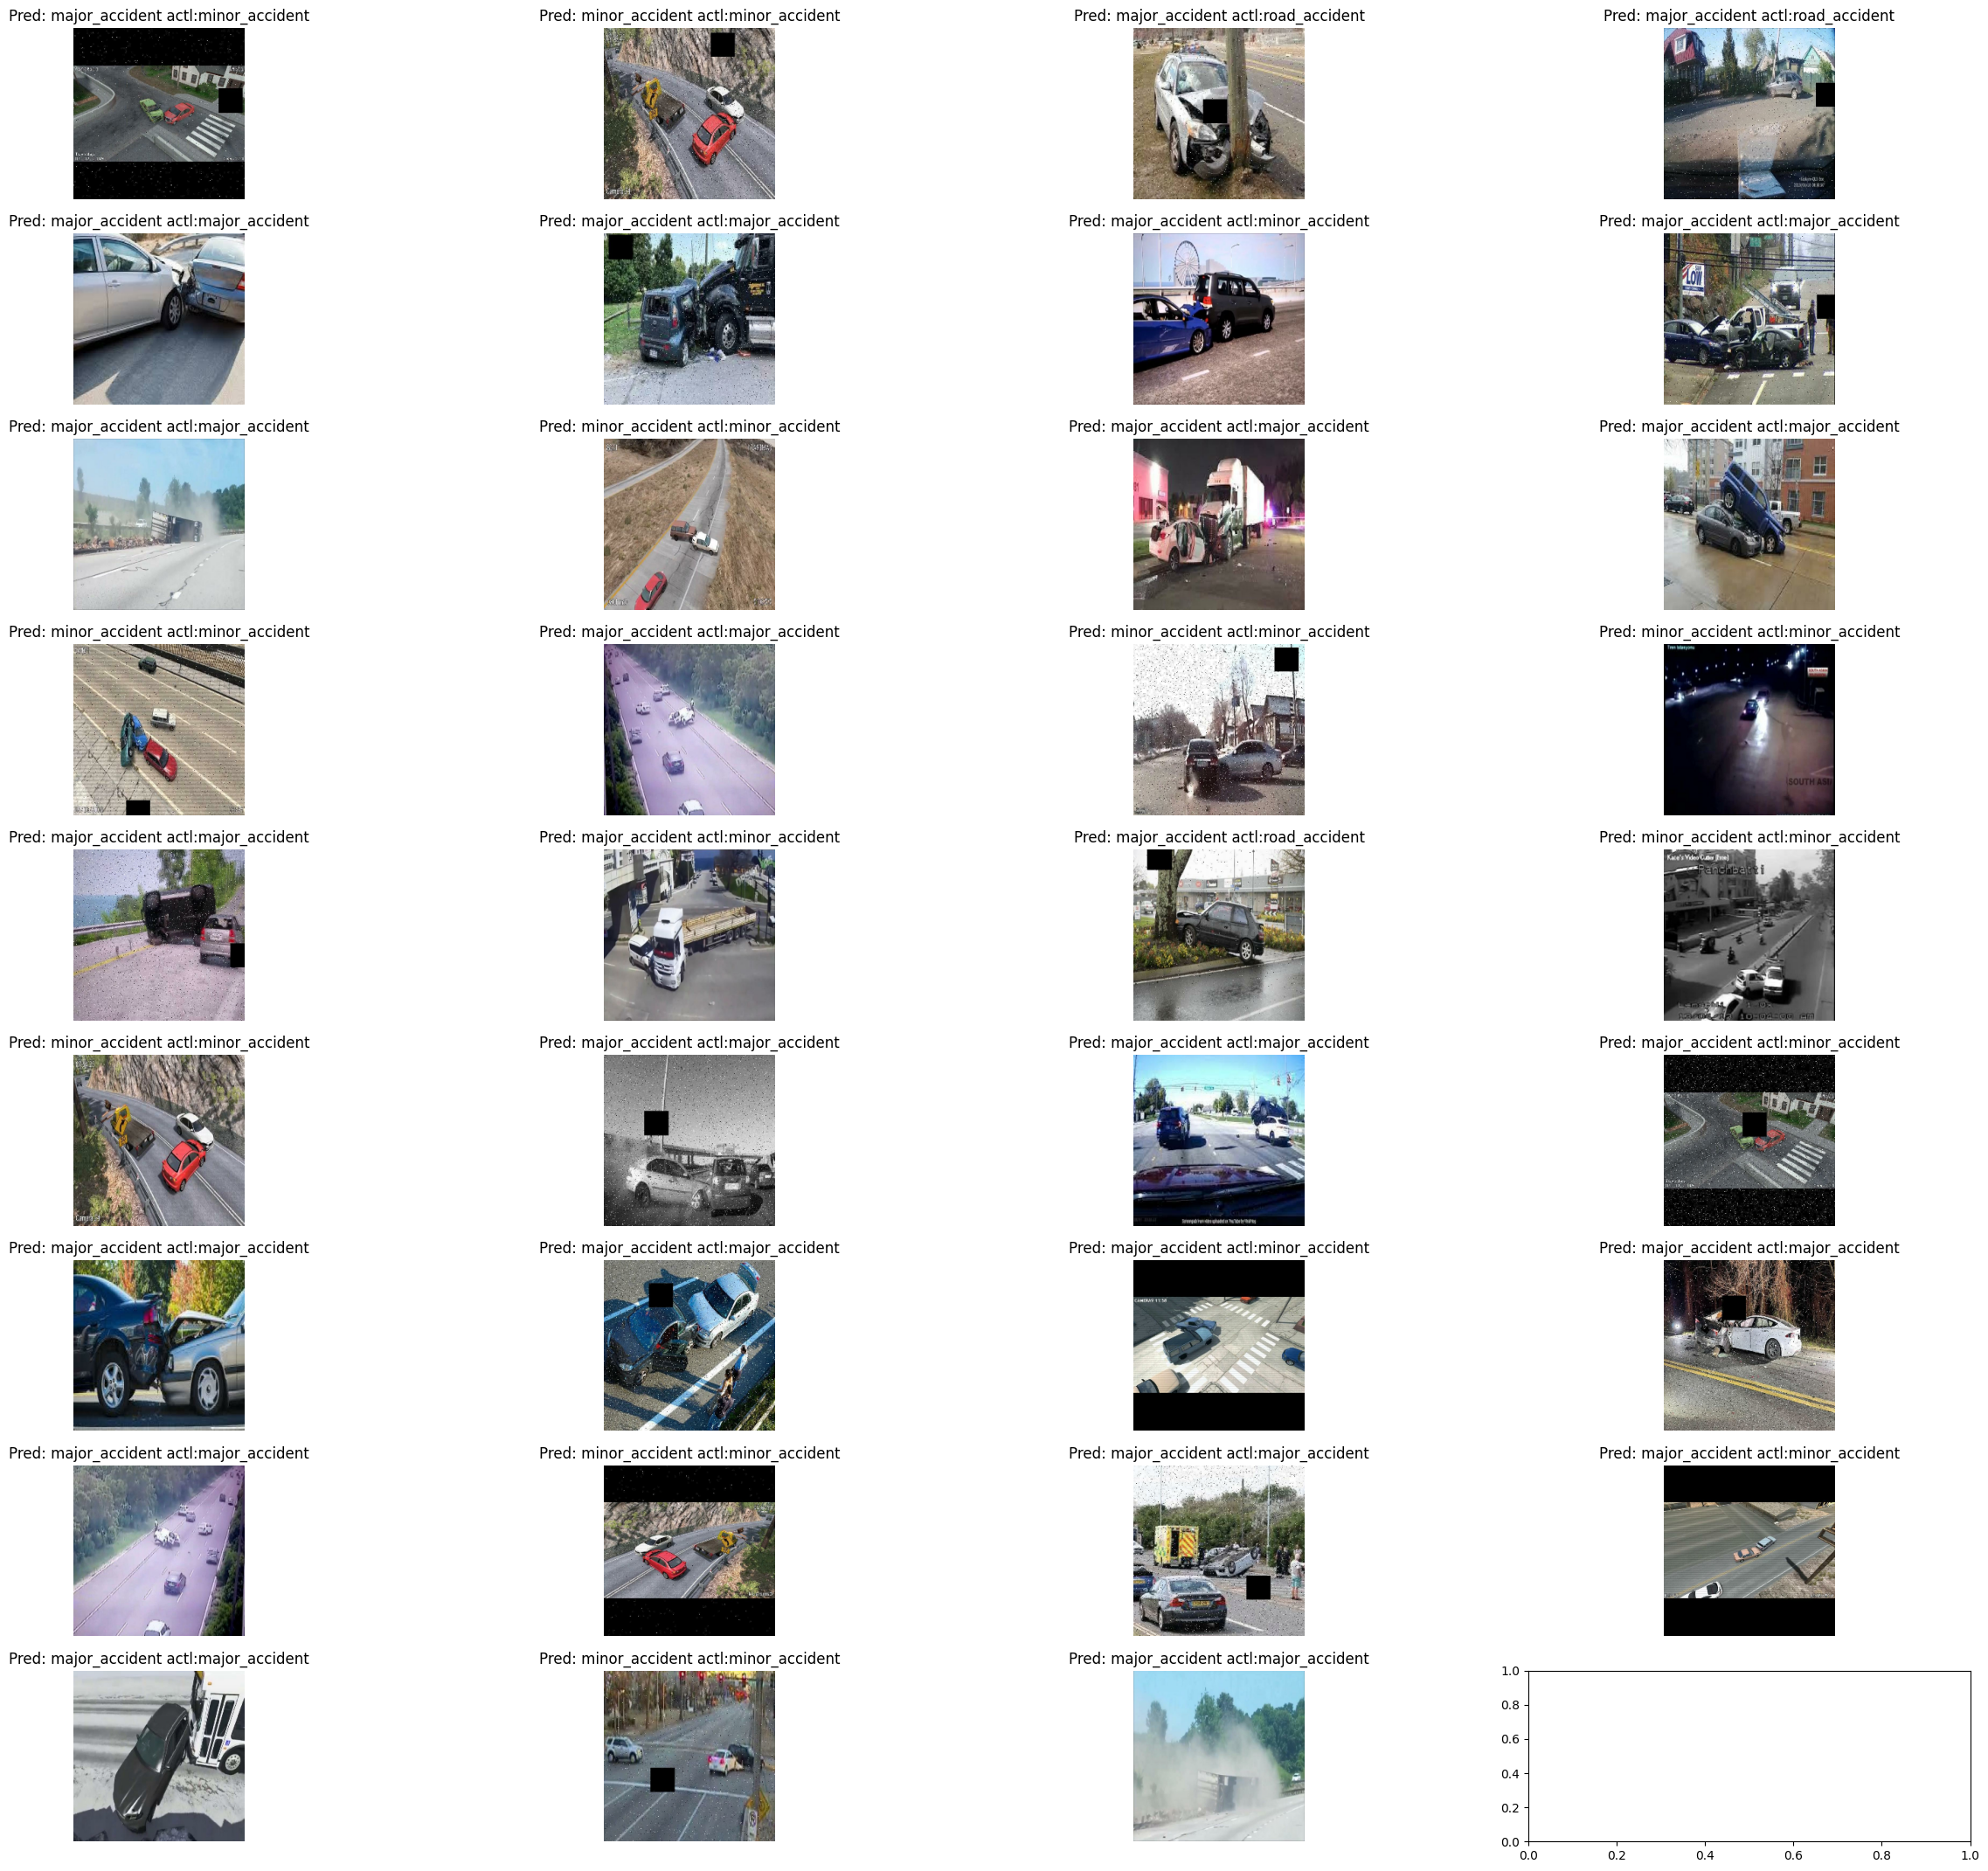

In [32]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [34]:

model.save('my_model.keras')

In [36]:

!pip install tensorflow


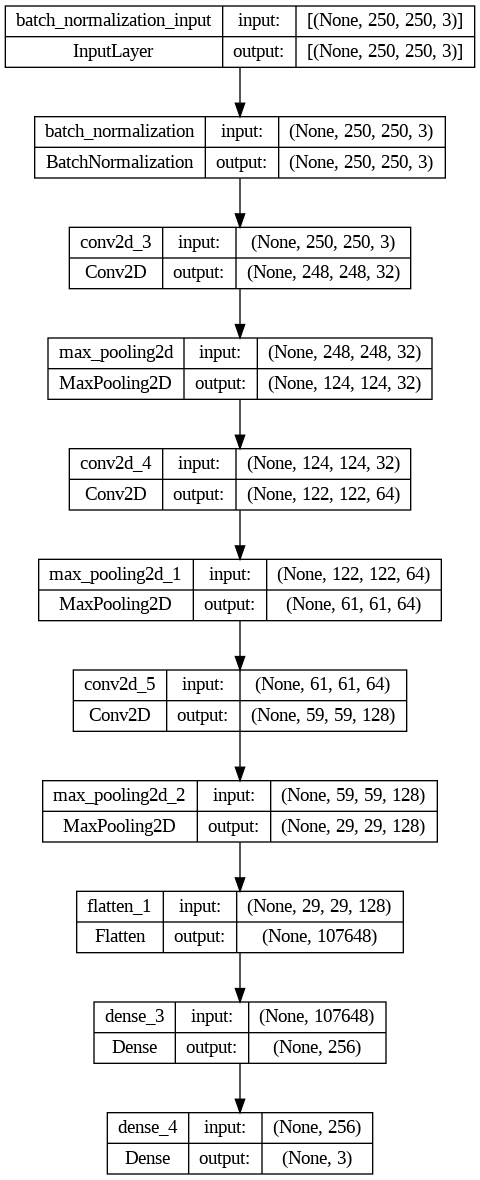

In [37]:
from tensorflow.keras.utils import plot_model


plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
